### Student Information
Name: 王士熏

Student ID: s1136102

GitHub ID: Hsun1128

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
# Setup and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helpers.data_mining_helpers as dmh

DATA_PATH = "newdataset/Reddit-stock-sentiment.csv"

df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head()

Shape: (847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


## Checkking Dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [3]:
df.isnull().sum()

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

In [4]:
df.describe()

,upvotes,downvotes,upvote_ratio,subjectivity,polarity,sentiment,label
count,847.000000,64.000000,64.000000,847.000000,847.000000,847.000000,847.000000
mean,12.262102,0.265625,0.981406,0.346768,0.036116,0.144038,-0.243211
std,142.126337,1.461052,0.068147,0.317261,0.297814,0.767566,0.664801
min,-74.000000,0.000000,0.500000,0.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.366667,0.000000,0.000000,0.000000
75%,4.000000,0.000000,1.000000,0.577500,0.150000,1.000000,0.000000
max,3943.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df['type'].value_counts()

type
comment    783
post        64
Name: count, dtype: int64

## Missing values

In [6]:
# 只取有用的欄位
drop_cols = ['downvotes', 'upvote_ratio']
df = df.drop(columns=drop_cols)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   text          847 non-null    object 
 9   subjectivity  847 non-null    float64
 10  polarity      847 non-null    float64
 11  sentiment     847 non-null    float64
 12  entities      847 non-null    object 
 13  label         847 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 92.8+ KB


In [8]:
df.describe()

,upvotes,subjectivity,polarity,sentiment,label
count,847.000000,847.000000,847.000000,847.000000,847.000000
mean,12.262102,0.346768,0.036116,0.144038,-0.243211
std,142.126337,0.317261,0.297814,0.767566,0.664801
min,-74.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,0.366667,0.000000,0.000000,0.000000
75%,4.000000,0.577500,0.150000,1.000000,0.000000
max,3943.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

type            0
datetime        0
post_id         0
subreddit       0
title           0
author          0
url             0
upvotes         0
text            0
subjectivity    0
polarity        0
sentiment       0
entities        0
label           0
dtype: int64

In [10]:
# 檢查所有欄位中是否有空字串 ''
for col in df.columns:
    empty_count = df[col].eq('').sum()
    
    if empty_count > 0:
        print(f"欄位 '{col}':")
        print(f"  空字串 '': {empty_count}")


In [11]:
# 檢查所有欄位中是否有 'nan', 'none', 'na' 這些字串（不區分大小寫）
check_values = ['nan', 'none', 'na']

for col in df.columns:
    for check_val in check_values:
        # 檢查小寫形式
        count = df[col].astype(str).str.lower().eq(check_val).sum()
        if count > 0:
            print(f"欄位 '{col}':")
            print(f"  '{check_val}': {count}")


## Duplicate data

In [12]:
# Check duplicate data
sum(df.duplicated())

0

In [13]:
sum(df.duplicated('title'))

720

In [14]:
sum(df.duplicated('text'))

23

In [15]:
sum(df.duplicated('url'))

696

In [16]:
df.drop_duplicates(['text'], keep='first', inplace=True)

In [17]:
sum(df.duplicated('text'))

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 846
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          824 non-null    object 
 1   datetime      824 non-null    object 
 2   post_id       824 non-null    object 
 3   subreddit     824 non-null    object 
 4   title         824 non-null    object 
 5   author        824 non-null    object 
 6   url           824 non-null    object 
 7   upvotes       824 non-null    int64  
 8   text          824 non-null    object 
 9   subjectivity  824 non-null    float64
 10  polarity      824 non-null    float64
 11  sentiment     824 non-null    float64
 12  entities      824 non-null    object 
 13  label         824 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 96.6+ KB


## Data Preprocessing

In [19]:
df_sample = df.sample(n=400)

In [20]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 99 to 328
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          400 non-null    object 
 1   datetime      400 non-null    object 
 2   post_id       400 non-null    object 
 3   subreddit     400 non-null    object 
 4   title         400 non-null    object 
 5   author        400 non-null    object 
 6   url           400 non-null    object 
 7   upvotes       400 non-null    int64  
 8   text          400 non-null    object 
 9   subjectivity  400 non-null    float64
 10  polarity      400 non-null    float64
 11  sentiment     400 non-null    float64
 12  entities      400 non-null    object 
 13  label         400 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 46.9+ KB


In [21]:
# check sample data
print(f"資料筆數: {len(df_sample)}")
print(f"各類別分布:")
print(df_sample.type.value_counts())
df_sample.head()

資料筆數: 400
各類別分布:
type
comment    375
post        25
Name: count, dtype: int64


,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label
99,comment,2025-04-11 20:55:19,mmmmt2d,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,bullrfuk,https://www.reddit.com/r/wallstreetbets/commen...,12,Breaking News: Mango challenges Xi to a cage m...,0.000000,0.000000,0.0,"['WrestleMania', 'Mango', 'Xi', 'match', 'cage']",0.0
93,comment,2025-04-10 14:58:22,mmecl9h,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,dancness,https://www.reddit.com/r/stocks/comments/1jvzr...,294,1. Make middle class homeless by causing hype...,0.340000,-0.100000,-1.0,"['hyperinflation', 'homeless', 'labor', 'Make'...",-1.0
310,comment,2025-04-11 17:22:08,mmlgk0p,wallstreetbets,Retardation is on the menu boys! WSB is so back,Traa12,https://i.redd.it/0yq2ftren8ue1.jpeg,0,I caught a 3 day ban last time using retard. F...,0.688889,-0.600000,-1.0,"['time', 'day', 'retard']",-1.0
369,post,2023-10-04 13:36:18,16znfzs,stockstobuytoday,Anyone looking into Flow.TO (Water Company)?,Vosspatrick,https://www.reddit.com/r/stockstobuytoday/comm...,11,"Hey gents, I recently started seeing a new gir...",0.496324,0.217466,1.0,"['cardboard', 'cost', 't', 'bonus', 'grocery',...",0.0
611,comment,2025-04-12 3:15:02,mmoct4l,wallstreetbets,Retail giant TARGET has now declined for 10 co...,BituminousBitumin,https://i.redd.it/7tl6puv9waue1.jpeg,2,I've been in them. They're nothing special.,0.571429,0.357143,1.0,['nothing'],0.0


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: title={'center': 'Type Distribution'}, xlabel='type'>

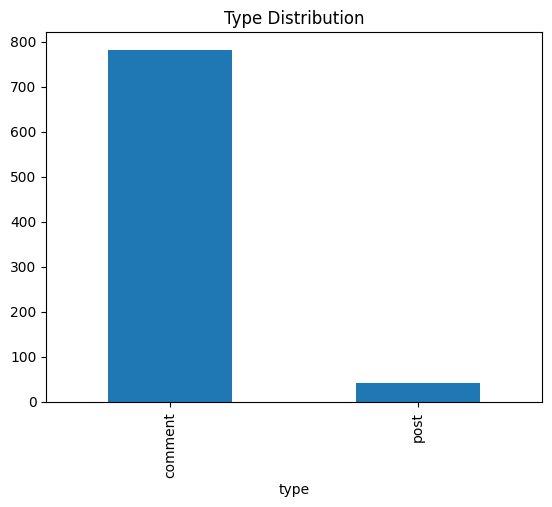

In [23]:
df.type.value_counts().plot(kind='bar',
                            title='Type Distribution')

<Axes: title={'center': 'Type Distribution'}, xlabel='type'>

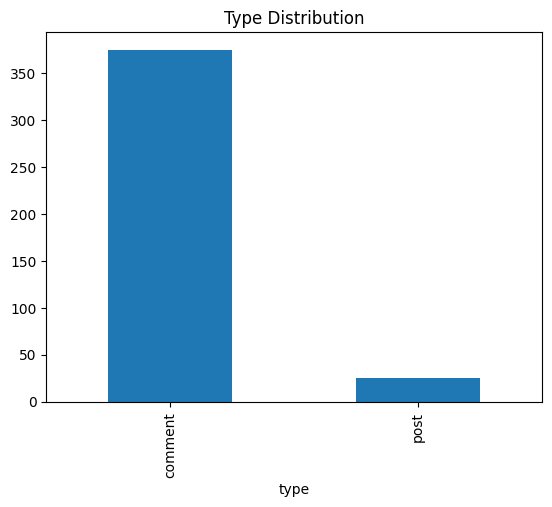

In [24]:
df_sample.type.value_counts().plot(kind='bar',
                            title='Type Distribution')

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

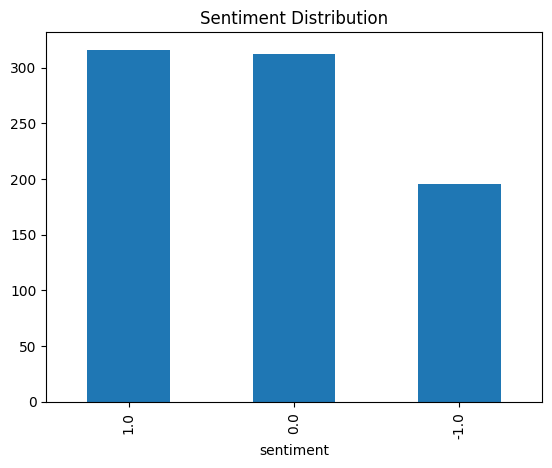

In [25]:
df.sentiment.value_counts().plot(kind='bar',
                                title='Sentiment Distribution')

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

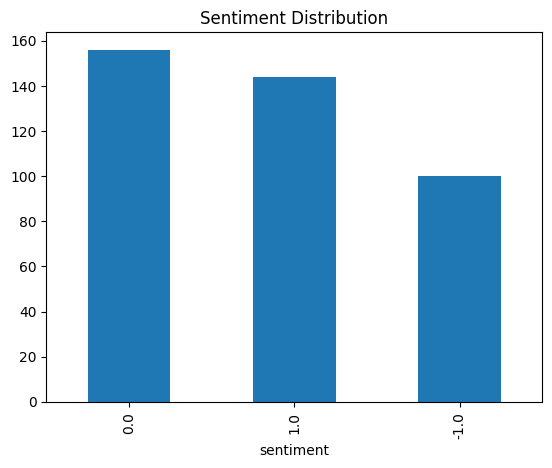

In [26]:
df_sample.sentiment.value_counts().plot(kind='bar',
                                title='Sentiment Distribution')

array([[<Axes: title={'center': 'upvotes'}>,
        <Axes: title={'center': 'subjectivity'}>],
       [<Axes: title={'center': 'polarity'}>,
        <Axes: title={'center': 'sentiment'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

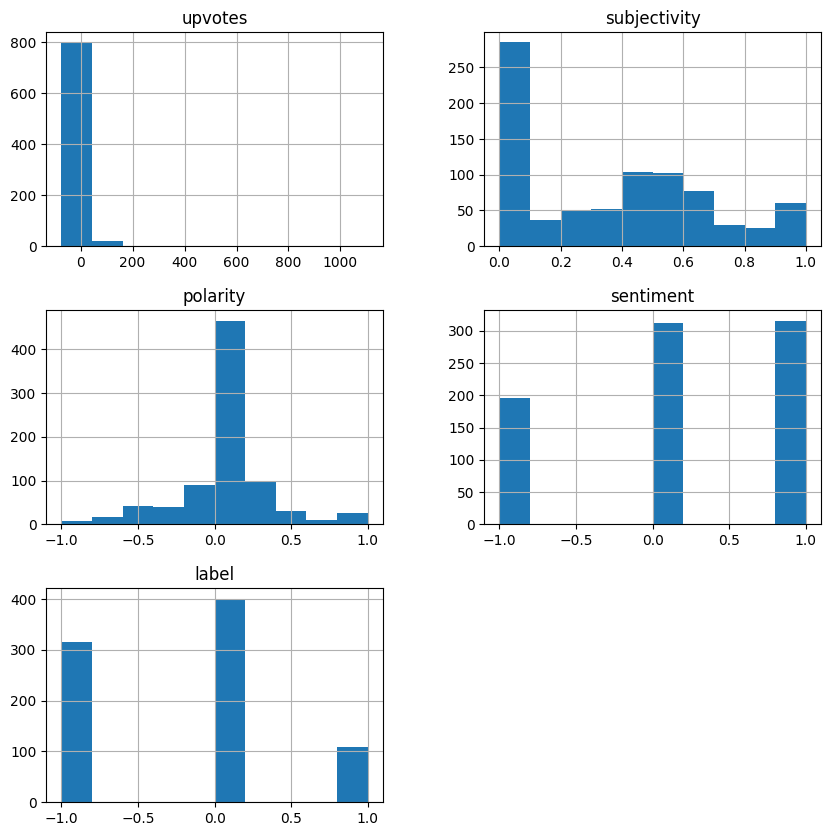

In [27]:
df.hist(figsize=(10, 10))

array([[<Axes: title={'center': 'upvotes'}>,
        <Axes: title={'center': 'subjectivity'}>],
       [<Axes: title={'center': 'polarity'}>,
        <Axes: title={'center': 'sentiment'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

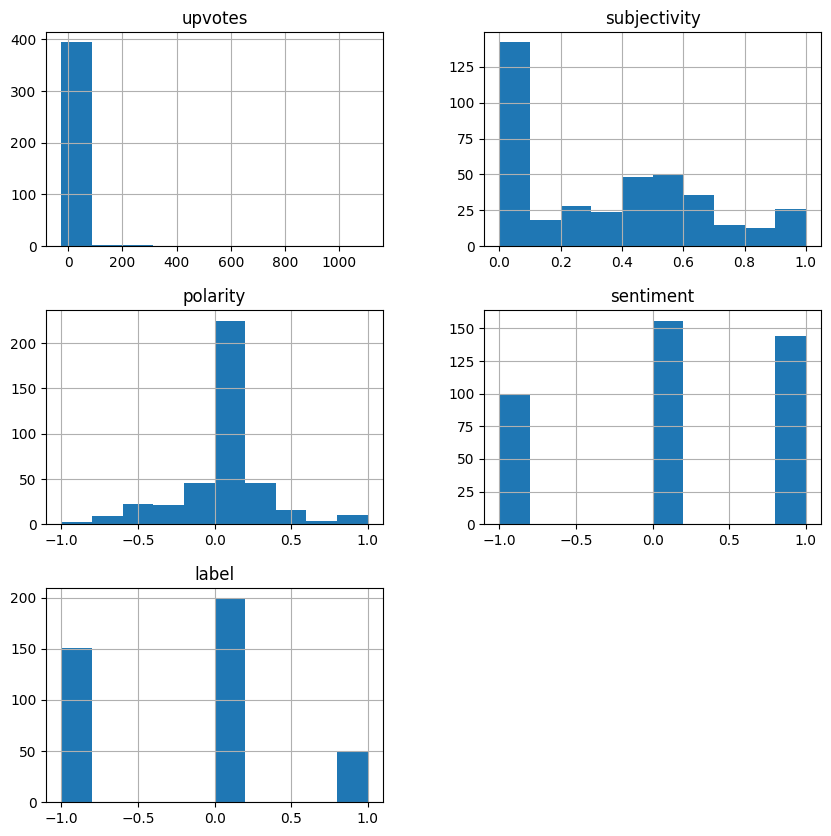

In [28]:
df_sample.hist(figsize=(10, 10))

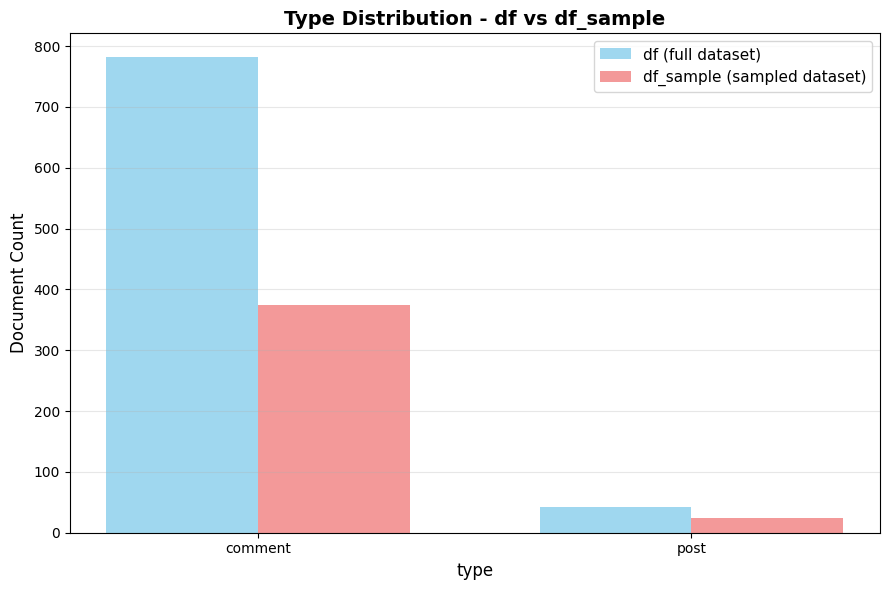

Type 分布詳細比較:
--------------------------------------------------
comment              | df:  782 | df_sample: 375 | 比例: 48.0%
post                 | df:   42 | df_sample:  25 | 比例: 59.5%


In [29]:
# Answer here
# 準備資料進行並排比較
df_counts = df.type.value_counts()
df_sample_counts = df_sample.type.value_counts()

# 確保兩個資料集有相同的類別順序
categories = df_counts.index
x_pos = np.arange(len(categories))

# 設定圖表大小
plt.figure(figsize=(9, 6))

# 設定長條圖的寬度
bar_width = 0.35

# 繪製並排長條圖
plt.bar(x_pos - bar_width/2, df_counts.values, bar_width, 
        label='df (full dataset)', alpha=0.8, color='skyblue')
plt.bar(x_pos + bar_width/2, [df_sample_counts.get(cat, 0) for cat in categories], 
        bar_width, label='df_sample (sampled dataset)', alpha=0.8, color='lightcoral')

# 設定圖表標題和標籤
plt.title('Type Distribution - df vs df_sample', fontsize=14, fontweight='bold')
plt.xlabel('type', fontsize=12)
plt.ylabel('Document Count', fontsize=12)

# 設定 x 軸標籤
plt.xticks(x_pos, categories, rotation=0, fontsize=10)

# 加入圖例
plt.legend(fontsize=11)

# 調整版面
plt.tight_layout()

# 顯示網格
plt.grid(axis='y', alpha=0.3)

# 顯示圖表
plt.show()

# 印出具體數值比較
print("Type 分布詳細比較:")
print("-" * 50)
for category in categories:
    df_count = df_counts[category]
    df_sample_count = df_sample_counts.get(category, 0)
    percentage = (df_sample_count / df_count) * 100 if df_count > 0 else 0
    print(f"{category:20} | df: {df_count:4d} | df_sample: {df_sample_count:3d} | 比例: {percentage:.1f}%")



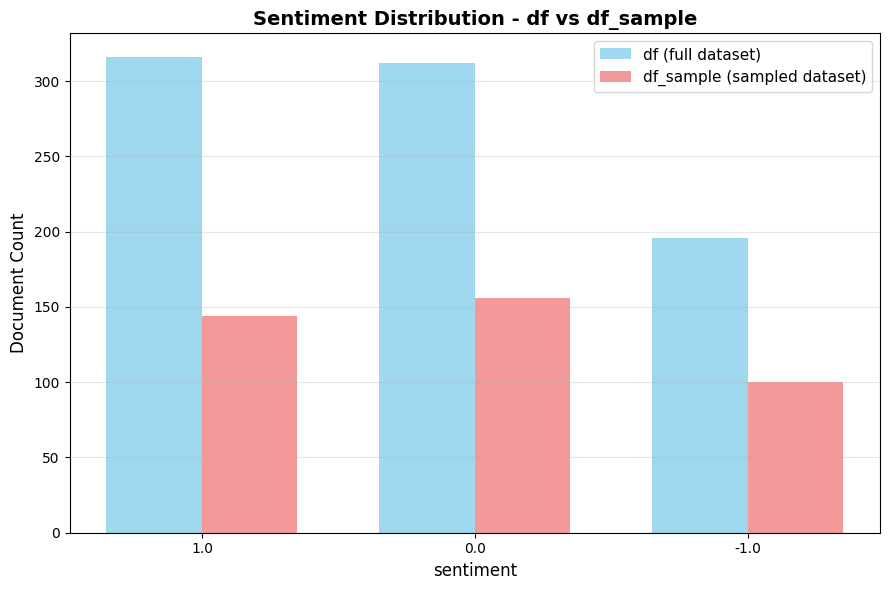

Sentiment 分布詳細比較:
--------------------------------------------------
                 1.0 | df:  316 | df_sample: 144 | 比例: 45.6%
                 0.0 | df:  312 | df_sample: 156 | 比例: 50.0%
                -1.0 | df:  196 | df_sample: 100 | 比例: 51.0%


In [30]:
# Answer here
# 準備資料進行並排比較
df_counts = df.sentiment.value_counts()
df_sample_counts = df_sample.sentiment.value_counts()

# 確保兩個資料集有相同的類別順序
categories = df_counts.index
x_pos = np.arange(len(categories))

# 設定圖表大小
plt.figure(figsize=(9, 6))

# 設定長條圖的寬度
bar_width = 0.35

# 繪製並排長條圖
plt.bar(x_pos - bar_width/2, df_counts.values, bar_width, 
        label='df (full dataset)', alpha=0.8, color='skyblue')
plt.bar(x_pos + bar_width/2, [df_sample_counts.get(cat, 0) for cat in categories], 
        bar_width, label='df_sample (sampled dataset)', alpha=0.8, color='lightcoral')

# 設定圖表標題和標籤
plt.title('Sentiment Distribution - df vs df_sample', fontsize=14, fontweight='bold')
plt.xlabel('sentiment', fontsize=12)
plt.ylabel('Document Count', fontsize=12)

# 設定 x 軸標籤
plt.xticks(x_pos, categories, rotation=0, fontsize=10)

# 加入圖例
plt.legend(fontsize=11)

# 調整版面
plt.tight_layout()

# 顯示網格
plt.grid(axis='y', alpha=0.3)

# 顯示圖表
plt.show()

# 印出具體數值比較
print("Sentiment 分布詳細比較:")
print("-" * 50)
for category in categories:
    df_count = df_counts[category]
    df_sample_count = df_sample_counts.get(category, 0)
    percentage = (df_sample_count / df_count) * 100 if df_count > 0 else 0
    print(f"{category:20} | df: {df_count:4d} | df_sample: {df_sample_count:3d} | 比例: {percentage:.1f}%")



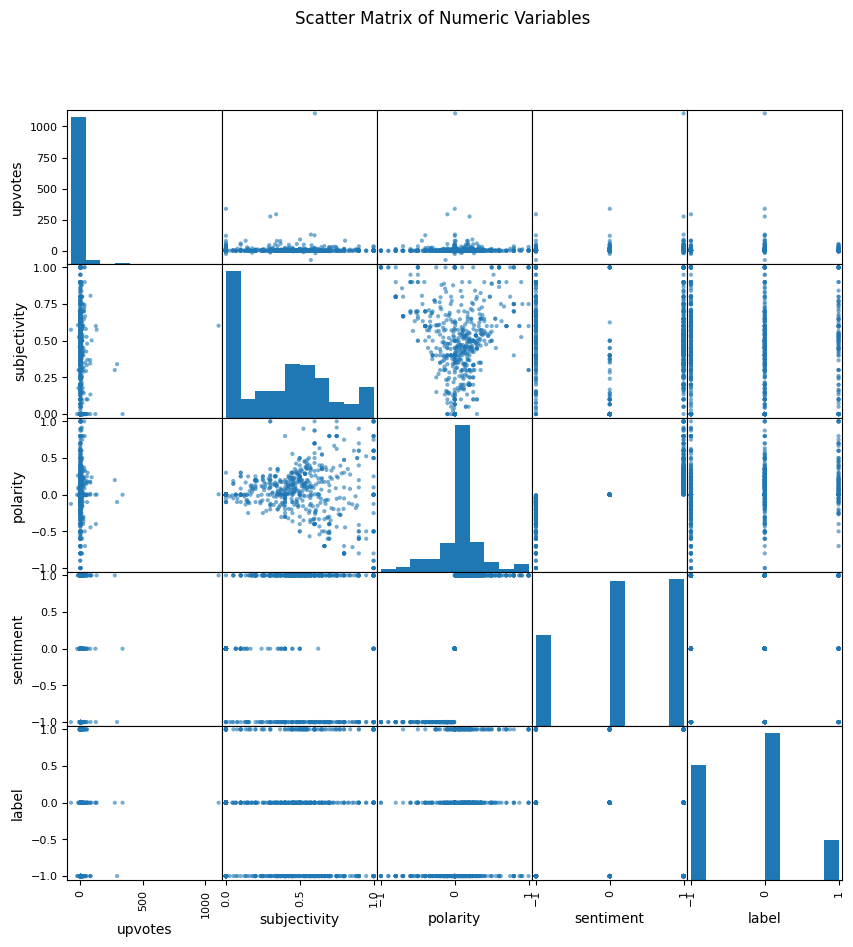

In [31]:
from pandas.plotting import scatter_matrix

# 選擇主要數值欄位創建散點圖矩陣
selected_cols = ['upvotes', 'subjectivity', 'polarity', 'sentiment', 'label']
df_numeric = df[selected_cols]

scatter_matrix(df_numeric, figsize=(10, 10), alpha=0.6, diagonal='hist')
plt.suptitle('Scatter Matrix of Numeric Variables')
plt.show()

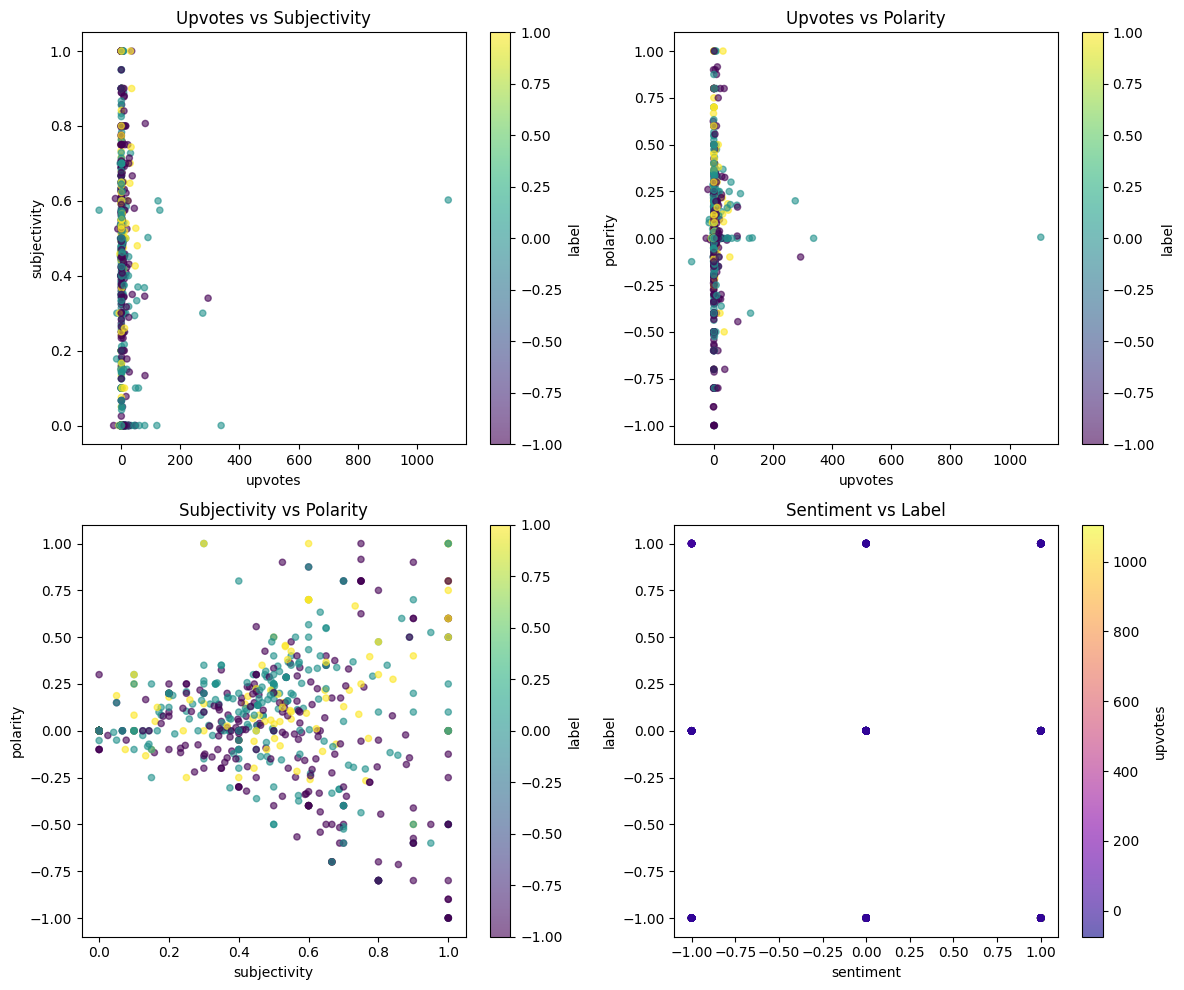

In [32]:
# 創建散點圖矩陣
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# upvotes vs subjectivity
df.plot.scatter(x='upvotes', y='subjectivity', c='label', colormap='viridis', 
                ax=axes[0,0], alpha=0.6)
axes[0,0].set_title('Upvotes vs Subjectivity')

# upvotes vs polarity
df.plot.scatter(x='upvotes', y='polarity', c='label', colormap='viridis', 
                ax=axes[0,1], alpha=0.6)
axes[0,1].set_title('Upvotes vs Polarity')

# subjectivity vs polarity
df.plot.scatter(x='subjectivity', y='polarity', c='label', colormap='viridis', 
                ax=axes[1,0], alpha=0.6)
axes[1,0].set_title('Subjectivity vs Polarity')

# sentiment vs label
df.plot.scatter(x='sentiment', y='label', c='upvotes', colormap='plasma', 
                ax=axes[1,1], alpha=0.6)
axes[1,1].set_title('Sentiment vs Label')

plt.tight_layout()
plt.show()

## Feature Creation

In [33]:
import nltk

# takes a like a minute or two to process

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [34]:
df['unigrams'].head()

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                 [He, didn, ’, t, say, thank, you, .]
Name: unigrams, dtype: object

In [35]:
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label,unigrams
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"[Calls, on, retards]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,"[He, didn, ’, t, say, thank, you, .]"


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [37]:
count_vect.get_feature_names_out()[887]

'company'

In [38]:
count_vect.get_feature_names_out()[132]

'50x'

In [40]:
analyze = count_vect.build_analyzer()
df.iloc[0]['text']
analyze(df.iloc[0]['text'])

['calls', 'on', 'retards']

In [ ]:
df_counts.shape

(824, 4346)

In [43]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [44]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [45]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [46]:
count_vect.get_feature_names_out()[0:2]

array(['00', '000'], dtype=object)

In [51]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_01378',
 'term_02',
 'term_027',
 'term_03',
 'term_06',
 'term_08',
 'term_10',
 'term_100',
 'term_1000',
 'term_10000',
 'term_100k',
 'term_100x',
 'term_10k',
 'term_10ks',
 'term_10yr',
 'term_11',
 'term_116',
 'term_118']

In [52]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [50]:
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

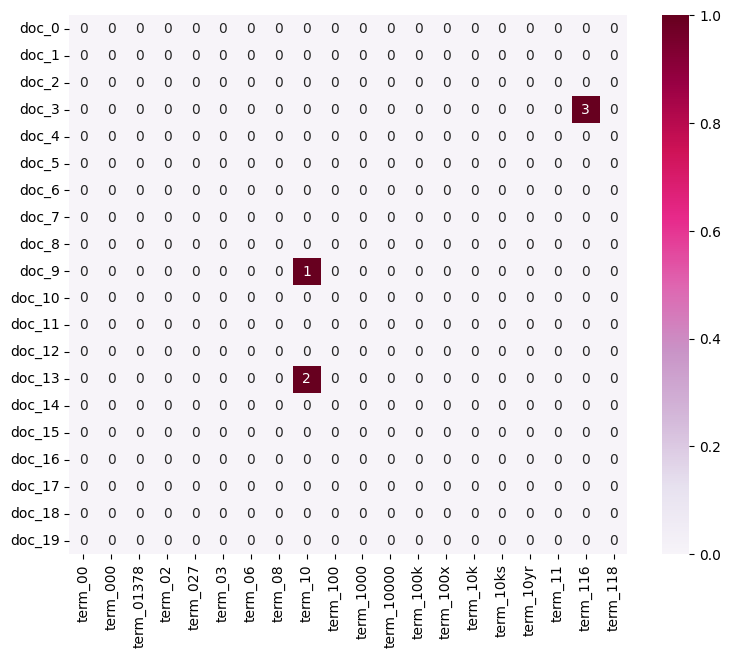

In [53]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

詞彙表大小: 4346
文檔數量: 824


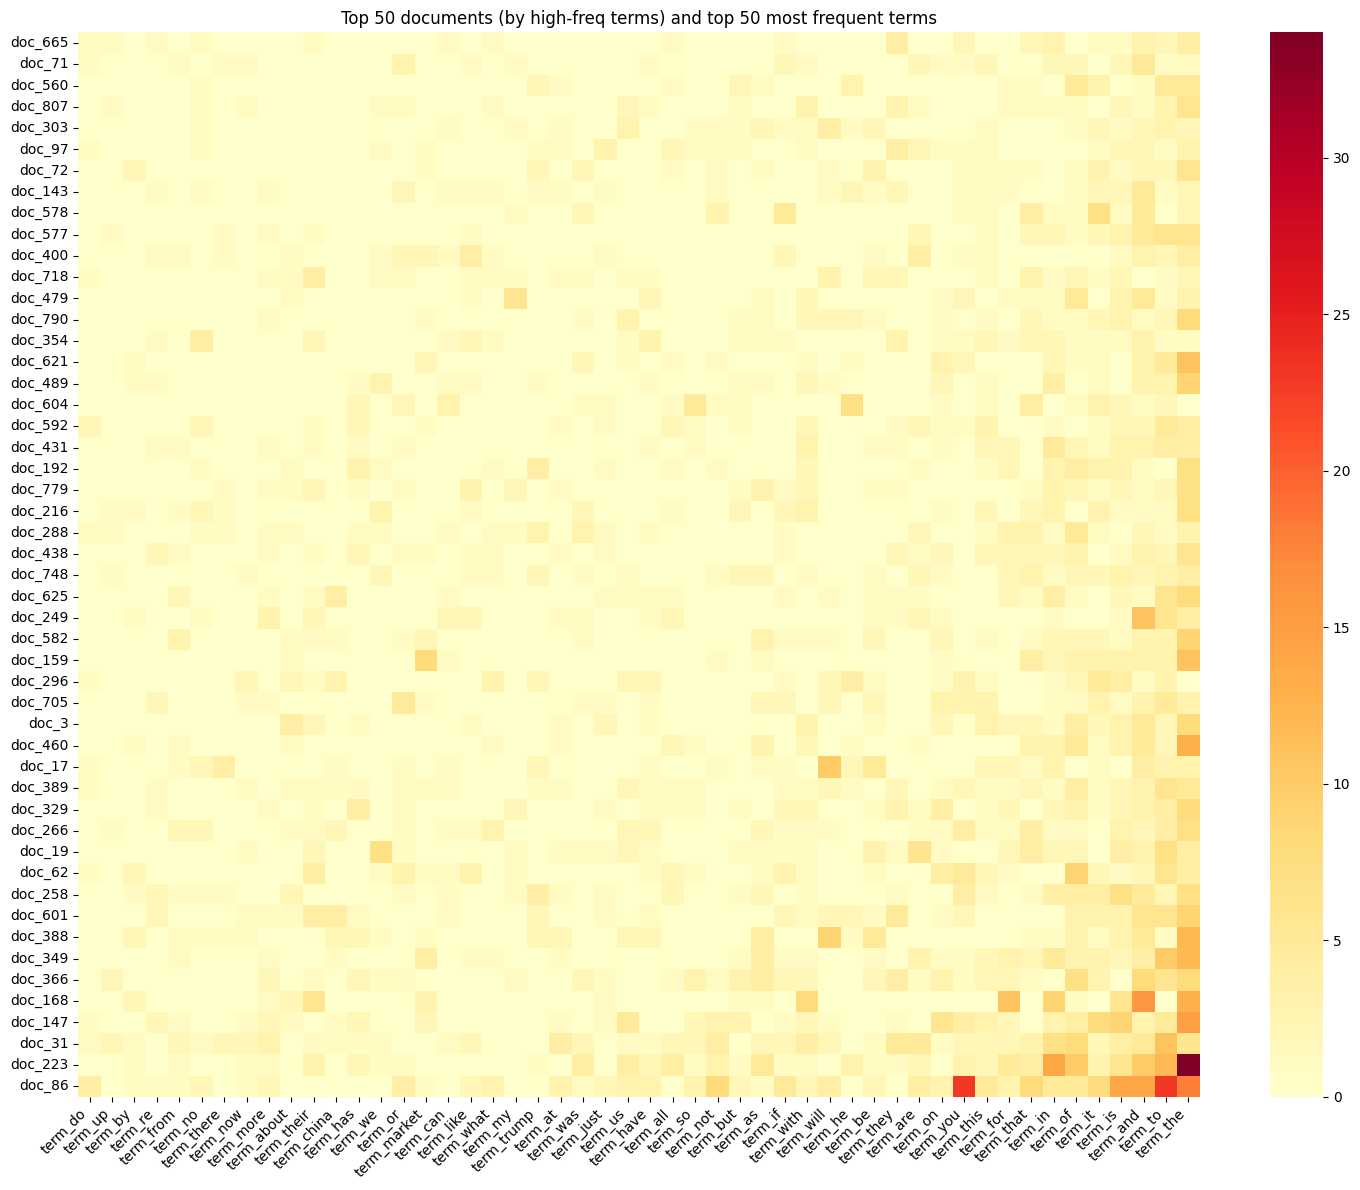

選中的文檔索引: [665  71 560 807 303  97  72 143 578 577 400 718 479 790 354 621 489 604
 592 431 192 779 216 288 438 748 625 249 582 159 296 705   3 460  17 389
 329 266  19  62 258 601 388 349 366 168 147  31 223  86]
選中的詞項索引: [1212 4071  680 3107 1639 2645 3854 2665 2544  175 3849  796 1837 4198
 2737 2424  697 2310 4224 2580 3977  406 4183 2197 4087 1842  289 3544
 2659  675  388 1987 4271 4255 1846  486 3858  374 2706 4333 3866 1604
 3846 2024 2687 2161 2149  327 3911 3848]

為了獲得有用且美觀的視覺化效果，我使用的方法包括：
1. 選擇性抽樣：選取詞頻最高的50個詞項和包含這些詞項最多的50個文檔
2. 智慧型過濾：避免顯示過於稀疏的區域，專注於數據密集的部分
3. 關閉數值標註：當矩陣較大時避免文字重疊
4. 使用適合的色彩映射：YlOrRd色彩方案在表示頻率數據時更為直觀
5. 添加適當的標題：提高圖表的可讀性


In [59]:
# Answer here

# 為了有效率地視覺化整個詞項-文檔矩陣，我會使用以下方法：

# 找出詞頻最高的50個詞項，並選擇包含這些詞項最多的50個文檔
print("詞彙表大小:", df_counts.shape[1])
print("文檔數量:", df_counts.shape[0])

# 計算每個詞項的總頻率
term_freq_sums = np.asarray(df_counts.sum(axis=0)).flatten()

# 選擇出現頻率最高的前50個詞項
top_terms_idx = np.argsort(term_freq_sums)[-50:]
top_term_names = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_terms_idx]]

# 計算每個文檔中這50個高頻詞項的總出現次數
top_terms_matrix = df_counts[:, top_terms_idx]
doc_scores = np.array(top_terms_matrix.sum(axis=1)).flatten()

# 選擇包含這些高頻詞項最多的前50個文檔
top_docs_idx = np.argsort(doc_scores)[-50:]
top_doc_names = ["doc_"+ str(i) for i in top_docs_idx]

# 提取對應的子矩陣 - 包含高頻詞項最多的50個文檔 × 詞頻最高的50個詞項
plot_z_large = df_counts[top_docs_idx, :][:, top_terms_idx].toarray()

# 創建更大的熱力圖
plt.figure(figsize=(15, 12))
df_large = pd.DataFrame(plot_z_large, columns=top_term_names, index=top_doc_names)
ax = sns.heatmap(df_large, 
                 cmap="YlOrRd", 
                 vmin=0, 
                 vmax=np.max(plot_z_large),
                 annot=False,  # 關閉數值標註以避免過度擁擠
                 cbar=True)
plt.title("Top 50 documents (by high-freq terms) and top 50 most frequent terms")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"選中的文檔索引: {top_docs_idx}")
print(f"選中的詞項索引: {top_terms_idx}")

print("\n為了獲得有用且美觀的視覺化效果，我使用的方法包括：")
print("1. 選擇性抽樣：選取詞頻最高的50個詞項和包含這些詞項最多的50個文檔")
print("2. 智慧型過濾：避免顯示過於稀疏的區域，專注於數據密集的部分")
print("3. 關閉數值標註：當矩陣較大時避免文字重疊")
print("4. 使用適合的色彩映射：YlOrRd色彩方案在表示頻率數據時更為直觀")
print("5. 添加適當的標題：提高圖表的可讀性")



### Transform Text Data


In [66]:
term_frequencies = np.asarray(df_counts.sum(axis=0)).flatten()

term_frequencies

array([4, 6, 1, ..., 1, 1, 1], shape=(4346,))

/tmp/ipykernel_19143/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


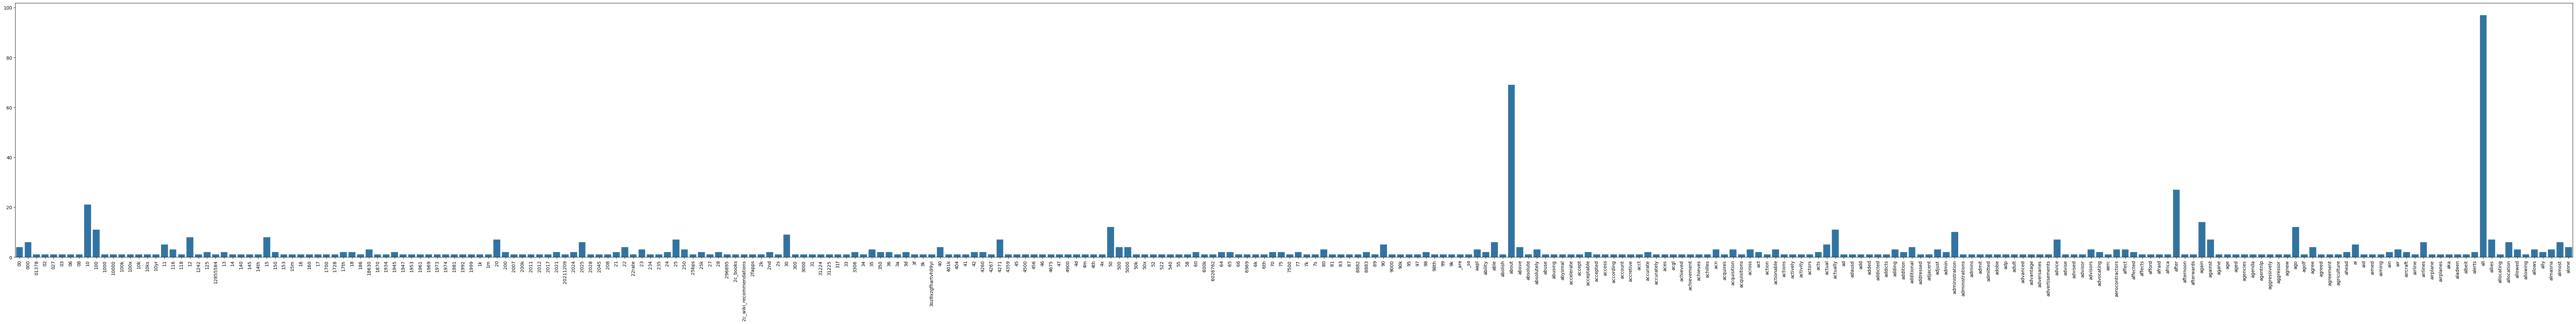

In [67]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [68]:
import plotly.express as px
import plotly.graph_objects as go

# 準備資料供plotly使用
df_terms = pd.DataFrame({
    'terms': count_vect.get_feature_names_out()[:300],
    'frequency': term_frequencies[:300]
})

# 建立互動式長條圖
fig = px.bar(df_terms, 
             x='terms', 
             y='frequency',
             title='詞彙頻率互動式視覺化 (前300個詞彙)',
             labels={'terms': '詞彙', 'frequency': '頻率'},
             hover_data={'frequency': True})

# 調整圖表樣式
fig.update_layout(
    width=1200,
    height=600,
    xaxis_tickangle=-90,
    showlegend=False
)

# 顯示圖表
fig.show()


In [69]:
# Answer here
# 只顯示前200個最高頻率的詞彙
top_200_indices = np.argsort(term_frequencies)[-200:][::-1]
top_200_terms = count_vect.get_feature_names_out()[top_200_indices]
top_200_values = term_frequencies[top_200_indices]

# 準備前200高頻詞彙資料
df_top_200 = pd.DataFrame({
    'terms': top_200_terms,
    'frequency': top_200_values
})

print(f"顯示前200個最高頻率的詞彙")

# 建立前200高頻詞彙視覺化
fig_top_200 = px.bar(df_top_200, 
                     x='terms', 
                     y='frequency',
                     title='前200個最高頻率詞彙視覺化',
                     labels={'terms': '詞彙', 'frequency': '頻率'},
                     hover_data={'frequency': True})

fig_top_200.update_layout(
    width=1000,
    height=500,
    xaxis_tickangle=-90,
    showlegend=False
)

fig_top_200.show()


顯示前200個最高頻率的詞彙


In [72]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/tmp/ipykernel_19143/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



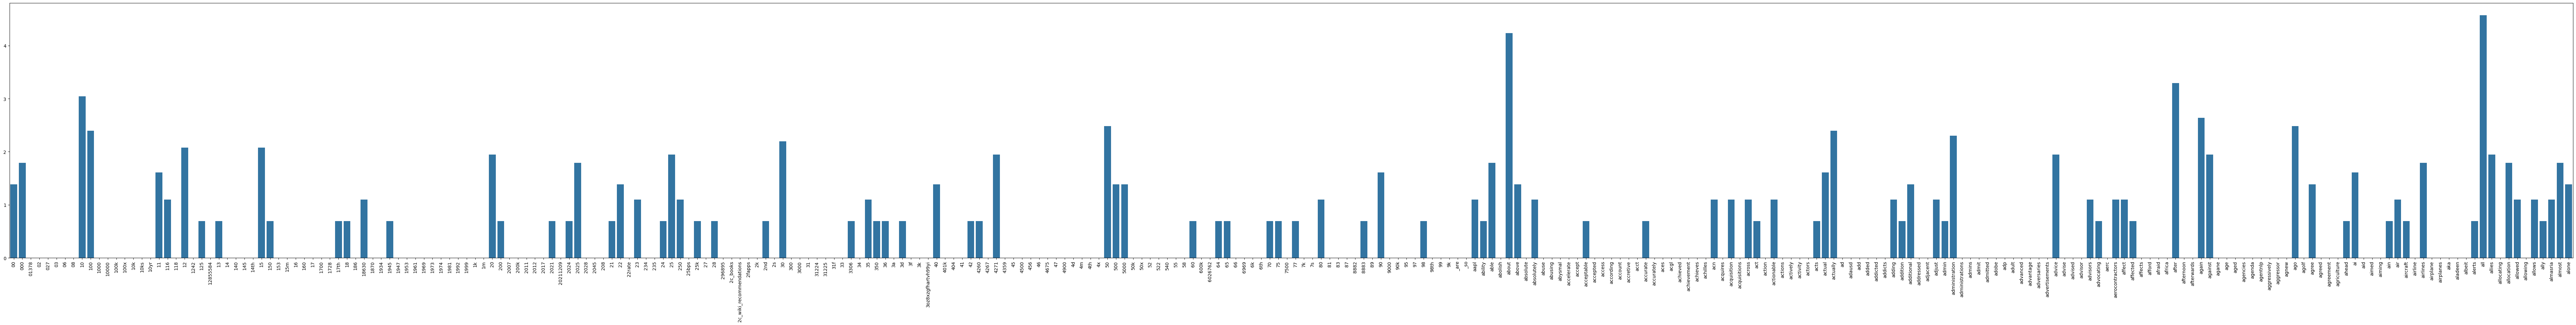

In [73]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [74]:
# 創建包含詞彙、對數頻率和排名的DataFrame
terms_log_data = []
for i, term in enumerate(count_vect.get_feature_names_out()):
    terms_log_data.append({
        'terms': term,
        'log_frequency': term_frequencies_log[i],
        'rank': i + 1
    })

df_terms_log = pd.DataFrame(terms_log_data)

# 根據對數頻率排序（由高到低）
df_sorted_log = df_terms_log.sort_values('log_frequency', ascending=False).reset_index(drop=True)
df_sorted_log['rank'] = range(1, len(df_sorted_log) + 1)

# 取前300個詞彙進行視覺化
df_sorted_log_top300 = df_sorted_log.head(300)

# 根據對數頻率排序詞彙（由高到低）
fig_terms_sorted_log = px.bar(df_sorted_log_top300, 
                              x='terms', 
                              y='log_frequency',
                              title='詞彙對數頻率視覺化 - 按對數頻率排序 (前300個詞彙)',
                              labels={'terms': '詞彙', 'log_frequency': '詞彙對數頻率'},
                              hover_data={'log_frequency': True, 'rank': True})

fig_terms_sorted_log.update_layout(
    width=1200,
    height=600,
    xaxis_tickangle=-90,
    showlegend=False
)

fig_terms_sorted_log.show()

# 對數分佈的統計分析
top_300_log_frequencies = df_sorted_log_top300['log_frequency'].values
top_300_log_terms = df_sorted_log_top300['terms'].values

# 計算前10%和後10%詞彙的平均對數頻率
top_10_percent_count_log = int(300 * 0.1)
top_10_percent_avg_log = np.mean(top_300_log_frequencies[:top_10_percent_count_log])
bottom_10_percent_avg_log = np.mean(top_300_log_frequencies[-top_10_percent_count_log:])

print(f"\n對數頻率長尾效應分析:")
print(f"前10%詞彙的平均對數頻率: {top_10_percent_avg_log:.2f}")
print(f"後10%詞彙的平均對數頻率: {bottom_10_percent_avg_log:.2f}")
print(f"對數頻率差異: {top_10_percent_avg_log - bottom_10_percent_avg_log:.2f}")
print(f"最高對數頻率詞彙: '{top_300_log_terms[0]}' (對數頻率: {top_300_log_frequencies[0]:.2f})")
print(f"第300高對數頻率詞彙: '{top_300_log_terms[299]}' (對數頻率: {top_300_log_frequencies[299]:.2f})")

# 觀察到的差異和洞察：
print("\n=== 對數分佈與原始頻率分佈的差異分析 ===")
print("1. 視覺化差異:")
print("   - 對數轉換後，高頻率和低頻率詞彙之間的差距被壓縮")
print("   - 原本極端的長尾分佈變得更加平滑和易於觀察")
print("   - y軸的尺度從數千級別變為個位數級別")

print("\n2. 分佈特性:")
print("   - 原始頻率呈現典型的冪律分佈（Power Law）")
print("   - 對數轉換後呈現更接近線性的遞減趨勢")
print("   - 有助於識別中等頻率詞彙的重要性")

print("\n3. 實際洞察:")
print("   - 對數分佈有助於平衡高頻和低頻詞彙的重要性")
print("   - 在信息檢索中，TF-IDF等算法就使用了對數轉換")
print("   - 對數轉換可以減少極高頻詞彙（如停用詞）的主導效應")
print("   - 更容易識別具有中等重要性但被高頻詞彙掩蓋的詞彙")

print("\n4. 應用場景:")
print("   - 文本分析：平衡詞彙重要性，避免高頻詞主導")
print("   - 特徵工程：對數轉換常用於處理偏態分佈的特徵")
print("   - 資料視覺化：使極端值的影響降低，更易於觀察整體模式")





對數頻率長尾效應分析:
前10%詞彙的平均對數頻率: 5.12
後10%詞彙的平均對數頻率: 2.33
對數頻率差異: 2.80
最高對數頻率詞彙: 'the' (對數頻率: 6.79)
第300高對數頻率詞彙: 'idea' (對數頻率: 2.30)

=== 對數分佈與原始頻率分佈的差異分析 ===
1. 視覺化差異:
   - 對數轉換後，高頻率和低頻率詞彙之間的差距被壓縮
   - 原本極端的長尾分佈變得更加平滑和易於觀察
   - y軸的尺度從數千級別變為個位數級別

2. 分佈特性:
   - 原始頻率呈現典型的冪律分佈（Power Law）
   - 對數轉換後呈現更接近線性的遞減趨勢
   - 有助於識別中等頻率詞彙的重要性

3. 實際洞察:
   - 對數分佈有助於平衡高頻和低頻詞彙的重要性
   - 在信息檢索中，TF-IDF等算法就使用了對數轉換
   - 對數轉換可以減少極高頻詞彙（如停用詞）的主導效應
   - 更容易識別具有中等重要性但被高頻詞彙掩蓋的詞彙

4. 應用場景:
   - 文本分析：平衡詞彙重要性，避免高頻詞主導
   - 特徵工程：對數轉換常用於處理偏態分佈的特徵
   - 資料視覺化：使極端值的影響降低，更易於觀察整體模式


# Phase 2

In [ ]:
### Begin Assignment Here